<b>We will take the Housing dataset which contains information about different houses in Boston</b>

We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. 
The objective is to predict the value of prices of the house using the given features.

In [151]:
# import the required libraries.
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import warnings
from numpy.linalg import inv
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

<b>load the housing data from the scikit-learn library</b>

In [152]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    boston_dataset = load_boston()

In [153]:
# Now load the data into a pandas dataframe using pd.DataFrame
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# print the first 5 rows of the data
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [154]:
# the target value MEDV (house prices) is missing from the data. 
# We create a new column of target values and add it to the dataframe.
boston['MEDV'] = boston_dataset.target

<b>Use some visualizations to understand the relationship of the target variable with other features.</b>

We see that the values of MEDV are distributed normally with few outliers.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


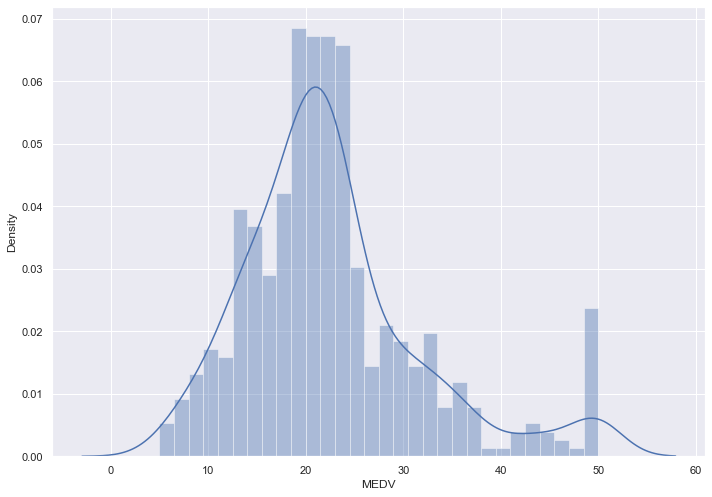

In [155]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

<b>Create a correlation matrix that measures the linear relationships between the variables.</b>

In [156]:
corr = boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


The correlation coefficient ranges from -1 to 1. If the value is close to 1,
it means that there is a strong positive correlation between the two variables. When it is close to -1,
the variables have a strong negative correlation.

From the above corelation plot we can see that MEDV is strongly correlated to LSTAT, RM

<b>Preparing the data for training the model</b>

In [157]:
#Select both these features together for training the model.
X = boston[['LSTAT', 'RM']].values  

# Target: prices of the house
y = boston_dataset.target

<b>Using a scatter plot to see how these features vary with MEDV.</b>

Which shows that the prices increase as the value of RM increases linearly

and The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

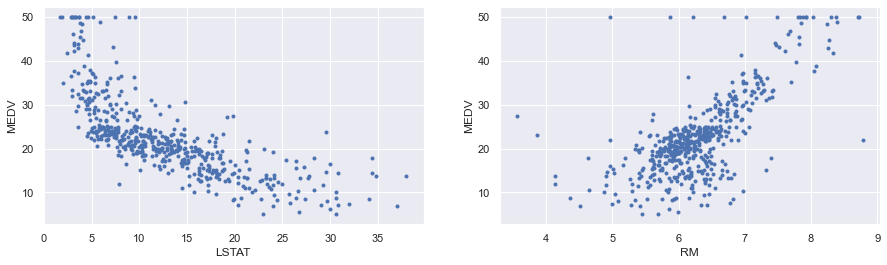

In [158]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.scatter(X[:,0], y ,marker='.')

plt.subplot(1,2,2)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.scatter(X[:,1], y ,marker='.')

<b>Splitting the data into training and testing sets</b>

Train the model with 80% of the samples and test with the remaining 20%

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 2)
(127, 2)
(379,)
(127,)


In [160]:
class LinearListSquare:
    def __init__(self):
        pass

    def fit(self,X,Y):
        self.w = np.matmul(inv(np.matmul(X.T,X)), np.matmul(X.T,Y))

    def predict(self, w):
        y_pred= np.matmul(X_test,self.w)
        return y_pred                     

<b>Train the model by the above class</b>

In [161]:
lls = LinearListSquare()
lls.fit(X_train,y_train)

In [162]:
lls.w

array([-0.66838729,  4.92421736])

In [163]:
y_pred = lls.predict(X_test)

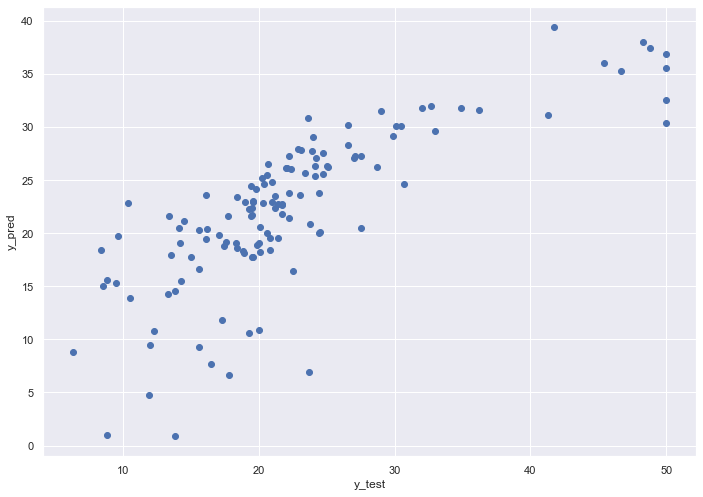

In [164]:
# plotting the y_test and y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

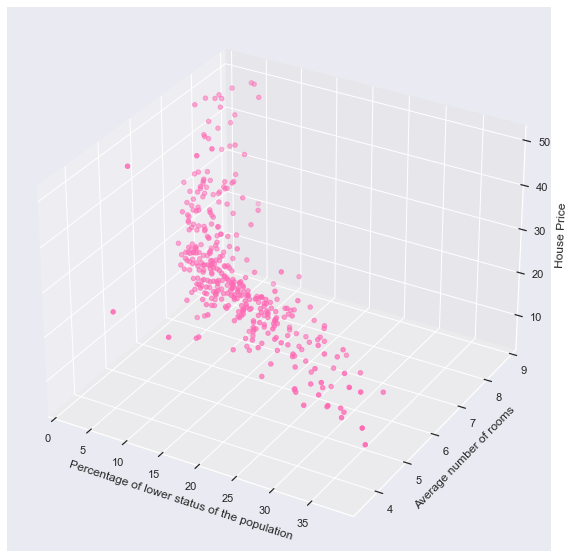

In [167]:
fig = plt.figure(figsize=(10,10))
p = fig.add_subplot(1,1,1,projection='3d')
p.scatter(X_train[:,0], X_train[:,1], y_train , c = 'hotpink')

p.set_xlabel('Percentage of lower status of the population')
p.set_ylabel('Average number of rooms')
p.set_zlabel('House Price')

plt.show()

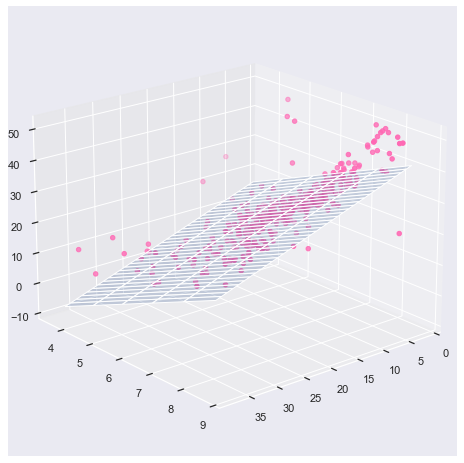

In [226]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = np.arange(X_train[:,0].min(), X_train[:,0].max())
y = np.arange(X_train[:,1].min(), X_train[:,1].max())

x, y = np.meshgrid(x, y)
plane = x * lls.w[0] + y * lls.w[1]
ax.plot_surface(x, y, plane ,alpha=0.25)

ax.scatter(X_train[:,0], X_train[:,1], y_train , c = 'hotpink')
ax.view_init(20,50)
plt.show()